In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from decpomdp import DecPOMDP
from problem import PROBLEM
import gc 
gc.enable()

In [2]:
problem_name = "dectiger"
planning_horizon = 2
gametype = "stackelberg"
sota = False
num_iterations = 2

PROBLEM.initialize(DecPOMDP(problem_name,horizon=planning_horizon))
from beliefSpace import BeliefSpace
from pbvi import PBVI



In [3]:
problem = PROBLEM.get_instance()
print(f"State size = {len(problem.STATES)}")
print(problem.JOINT_ACTIONS)
print(problem.JOINT_OBSERVATIONS)
for type,matrix in problem.REWARDS.items():
    print(type)
    print(f"leader :\n{matrix[0]}\nfollower : \n{matrix[1]}")


State size = 2
[0, 1, 2, 3, 4, 5, 6, 7, 8]
[0, 1, 2, 3]
cooperative
leader :
[[  -2.   -2.]
 [-101.    9.]
 [   9. -101.]
 [-101.    9.]
 [ -50.   20.]
 [-100. -100.]
 [   9. -101.]
 [-100. -100.]
 [  20.  -50.]]
follower : 
[[  -2.   -2.]
 [-101.    9.]
 [   9. -101.]
 [-101.    9.]
 [ -50.   20.]
 [-100. -100.]
 [   9. -101.]
 [-100. -100.]
 [  20.  -50.]]
zerosum
leader :
[[  -2.   -2.]
 [-101.    9.]
 [   9. -101.]
 [-101.    9.]
 [ -50.   20.]
 [-100. -100.]
 [   9. -101.]
 [-100. -100.]
 [  20.  -50.]]
follower : 
[[  2.   2.]
 [101.  -9.]
 [ -9. 101.]
 [101.  -9.]
 [ 50. -20.]
 [100. 100.]
 [ -9. 101.]
 [100. 100.]
 [-20.  50.]]
stackelberg
leader :
[[  -2.   -2.]
 [-101.    9.]
 [   9. -101.]
 [-101.    9.]
 [ -50.   20.]
 [-100. -100.]
 [   9. -101.]
 [-100. -100.]
 [  20.  -50.]]
follower : 
[[-20. -87.]
 [-98.  -7.]
 [-66. -70.]
 [-73. -84.]
 [ -7. -88.]
 [-15.  -7.]
 [ 13. -32.]
 [-90. -26.]
 [-47. -97.]]


In [4]:
# check belief objects and expansion

bs = BeliefSpace(planning_horizon,density=0.001)
bs.expansion()
bs.print_network()
bs.print_belief_table()

	belief expansion done, belief space size = 8

  ∟ belief 0 : [0.5 0.5]
      ∟ action 0, observation 0 : belief 1
      ∟ action 0, observation 1 : belief 0
      ∟ action 0, observation 2 : belief 0
      ∟ action 0, observation 3 : belief 2
      ∟ action 1, observation 0 : belief 0
      ∟ action 1, observation 1 : belief 0
      ∟ action 1, observation 2 : belief 0
      ∟ action 1, observation 3 : belief 0
      ∟ action 2, observation 0 : belief 0
      ∟ action 2, observation 1 : belief 0
      ∟ action 2, observation 2 : belief 0
      ∟ action 2, observation 3 : belief 0
      ∟ action 3, observation 0 : belief 0
      ∟ action 3, observation 1 : belief 0
      ∟ action 3, observation 2 : belief 0
      ∟ action 3, observation 3 : belief 0
      ∟ action 4, observation 0 : belief 0
      ∟ action 4, observation 1 : belief 0
      ∟ action 4, observation 2 : belief 0
      ∟ action 4, observation 3 : belief 0
      ∟ action 5, observation 0 : belief 0
      ∟ action 5, observa

In [5]:
from experiment import Experiment
experiment = Experiment(planning_horizon,num_iterations,algorithm="maxplane")
experiment.run_single_experiment(planning_horizon,gametype="stackelberg",sota=False)


			 Solving stackelberg dectiger GAME Horizon 2 WITH SOTA = False  
iteration : 1
	belief expansion done, belief space size = 8


========== Backup at timestep 1 ==========
		belief: 0 = [0.5 0.5] , 	leader value: 3.5, 	follower value (by state):  [-20.  -7.]
		belief: 1 = [0.96979866 0.03020134] , 	leader value: 5.70805369127517, 	follower value (by state):  [ 13. -26.]
		belief: 2 = [0.03020134 0.96979866] , 	leader value: -98.89387583892618, 	follower value (by state):  [-43.1875 -42.4375]

========== Backup at timestep 0 ==========
		belief: 0 = [0.5 0.5] , 	leader value: 10.486484375, 	follower value (by state):  [-16.67921875 -14.        ]



================================================= END OF stackelberg GAME WITH SOTA False ================================================================

				 alphavectors value at inital belief (V0,V1) : leader =  10.486484375 , follower = [-16.67921875 -14.        ]

iteration : 2
	belief expansion done, belief space size = 8


=========

([10.486484375, 10.486484375],
 [array([-16.67921875, -14.        ]), array([-16.67921875, -14.        ])],
 [0.11414694786071777, 0.1106870174407959])

In [6]:
experiment.run_experiment_decreasing_density(0.3)

			 Solving cooperative dectiger GAME Horizon 1 WITH SOTA = False  
iteration : 1
	belief expansion done, belief space size = 4


========== Backup at timestep 0 ==========
		belief: 0 = [0.5 0.5] , 	leader value: 9.0, 	follower value (by state):  [9. 9.]



================================================= END OF cooperative GAME WITH SOTA False ================================================================

				 alphavectors value at inital belief (V0,V1) : leader =  9.0 , follower = [9. 9.]

iteration : 2
	belief expansion done, belief space size = 6


========== Backup at timestep 0 ==========
		belief: 0 = [0.5 0.5] , 	leader value: 9.0, 	follower value (by state):  [9. 9.]



================================================= END OF cooperative GAME WITH SOTA False ================================================================

				 alphavectors value at inital belief (V0,V1) : leader =  9.0 , follower = [9. 9.]

			 Solving cooperative dectiger GAME Horizon 2 WITH SOTA = Fals

,gametype,SOTA,horizon,iterations,time,number_of_beliefs,leader values,follower values,density
0,cooperative,Stackelberg,1,2,"[0.049883127212524414, 0.04535317420959473]","[4, 6]","[9.0, 9.0]","[[9.0, 9.0], [9.0, 9.0]]","[0.3, 0.001]"
1,cooperative,Stackelberg,2,2,"[0.11898589134216309, 0.09942197799682617]","[4, 8]","[18.0, 18.0]","[[18.0, 18.0], [18.0, 18.0]]","[0.3, 0.001]"
2,cooperative,State of the Art,1,2,"[0.00482487678527832, 0.004788875579833984]","[4, 6]","[9.0, 9.0]","[[9.0, 9.0], [9.0, 9.0]]","[0.3, 0.001]"
3,cooperative,State of the Art,2,2,"[0.008105278015136719, 0.012166023254394531]","[4, 8]","[18.0, 18.0]","[[18.0, 18.0], [18.0, 18.0]]","[0.3, 0.001]"
4,zerosum,Stackelberg,1,2,"[0.06331586837768555, 0.06896615028381348]","[4, 6]","[-75.0, -75.0]","[[65.9375, 84.06249999999999], [65.9375, 84.06...","[0.3, 0.001]"
5,zerosum,Stackelberg,2,2,"[0.15923523902893066, 0.15063691139221191]","[4, 8]","[-150.0, -150.0]","[[150.0, 150.0], [150.0, 150.0]]","[0.3, 0.001]"
6,zerosum,State of the Art,1,2,"[0.027347803115844727, 0.026807069778442383]","[4, 6]","[-75.0, -75.0]","[[84.06249999999999, 65.9375], [84.06249999999...","[0.3, 0.001]"
7,zerosum,State of the Art,2,2,"[0.09078311920166016, 0.09702205657958984]","[4, 8]","[-150.0, -150.0]","[[168.125, 131.875], [168.125, 131.875]]","[0.3, 0.001]"
8,stackelberg,Stackelberg,1,2,"[0.01836085319519043, 0.021301984786987305]","[4, 6]","[3.5, 3.5]","[[-20.0, -7.0], [-20.0, -7.0]]","[0.3, 0.001]"
9,stackelberg,Stackelberg,2,2,"[0.09805107116699219, 0.10352802276611328]","[4, 8]","[10.486484375, 10.486484375]","[[-16.67921875, -14.0], [-16.67921875, -14.0]]","[0.3, 0.001]"


In [7]:
tables = experiment.generate_summary_table()
tables["zerosum"]

State of the Art                             PBVI               \
                        time leader value iteration      time leader value   
dectiger(0)         0.026807        -75.0         2  0.068966        -75.0   
dectiger(1)         0.097022       -150.0         2  0.150637       -150.0   

                       
            iteration  
dectiger(0)         2  
dectiger(1)         2

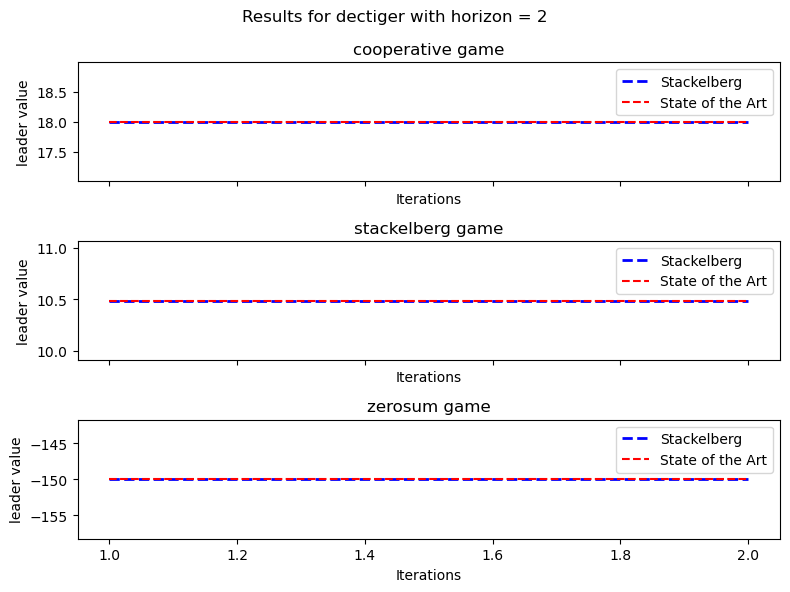

In [8]:
experiment.plots()

/Users/izzikampono/Documents/GitHub/Thesis-New/experiment.py:253: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = self.database[self.database["gametype"]==gametype][self.database["horizon"]==horizon]
/Users/izzikampono/Documents/GitHub/Thesis-New/experiment.py:253: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = self.database[self.database["gametype"]==gametype][self.database["horizon"]==horizon]
/Users/izzikampono/Documents/GitHub/Thesis-New/experiment.py:253: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = self.database[self.database["gametype"]==gametype][self.database["horizon"]==horizon]
/Users/izzikampono/Documents/GitHub/Thesis-New/experiment.py:253: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = self.database[self.database["gametype"]==gametype][self.database["horizon"]==horizon]
/Users/izzikampono/Documents/GitHub/Thesis-New/exper

FileNotFoundError: [Errno 2] No such file or directory: 'horizon_plot/dectiger (2).png'

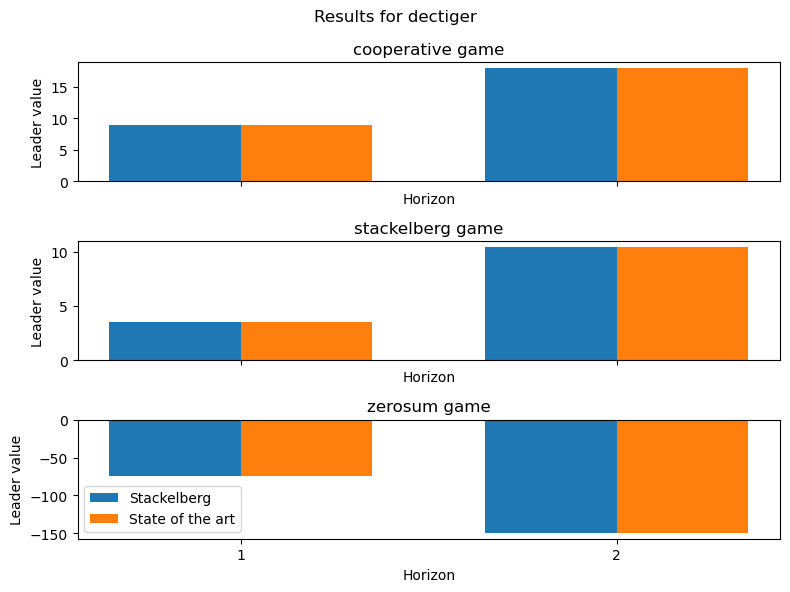

In [9]:
experiment.horizon_value_plot()